In [1]:
import json 
from pprint import pprint
import pandas as pd
import numpy as np

In [9]:
#Load the data frame file
userDf = pd.read_csv('userDfFile.csv',index_col=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
userDf.describe()

,average_stars,review_count
count,1.183362e+06,1.183362e+06
mean,3.711835e+00,2.372686e+01
std,1.105231e+00,8.050645e+01
min,1.000000e+00,0.000000e+00
25%,3.130000e+00,2.000000e+00
50%,3.890000e+00,5.000000e+00
75%,4.570000e+00,1.600000e+01
max,5.000000e+00,1.165600e+04


In [11]:
userDf.dtypes

average_stars    float64
review_count       int64
user_id           object
yelping_since     object
dtype: object

In [15]:
userDf.head()

,average_stars,review_count,user_id,yelping_since
0,3.80,272,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,2559,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,277,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,436,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,921,PcvbBOCOcs6_suRDH7TSTg,2012-08-16


In [16]:
userDf.tail()

,average_stars,review_count,user_id,yelping_since
1183357,1.00,1,OME6i0Xwqbx_xWMKgKqAjw,2009-05-09
1183358,2.00,1,3-y8vkrcLwEAXLPxPbr49Q,2016-10-21
1183359,3.42,22,ZjAfWpPFq9edGphegQXUfQ,2012-01-13
1183360,1.00,1,yC7UhCwzzteD_mpfA8mryw,2014-05-30
1183361,3.57,6,9iUkIqYh84eAOXBh-NPheA,2010-06-18


Define a new column "activity" to measure how active a user is. 

We find the most recent date among all "yelping_since", call it *most_recent*.

Then *activity=review_count/(most_recent+1-yelping_since)*

First covert string in 'yelping_since' column all to datetime format.

In [51]:
userDf['yelping_since']=pd.to_datetime(userDf['yelping_since'])
userDf.dtypes

average_stars           float64
review_count              int64
user_id                  object
yelping_since    datetime64[ns]
dtype: object

Find the most_recent yelping_since datetime:

In [41]:
most_recent=userDf['yelping_since'].max()
print(most_recent)

2017-07-26 00:00:00


Now calculate *activity* and store all values in a new column *activity*.

Since the value is usually very small, we multiply it by 1000.

Thus, *activity* means the number of reviews the user writes per 1000 days.

In [71]:
userDf['activity']=userDf.apply(lambda row: round(row.review_count*1000/((most_recent-row.yelping_since).days+1)),axis=1)

In [73]:
userDf.head()

,average_stars,review_count,user_id,yelping_since,activity
0,3.80,272,lsSiIjAKVl-QRxKjRErBeg,2010-07-13,106
1,3.94,2559,om5ZiponkpRqUNa3pVPiRg,2006-01-18,608
2,4.72,277,-lGwMGHMC_XihFJNKCJNRg,2014-10-31,277
3,3.76,436,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01,276
4,4.23,921,PcvbBOCOcs6_suRDH7TSTg,2012-08-16,510


In [74]:
userDf['activity'].min()

0

In [75]:
userDf['activity'].max()

13500

In [76]:
userDf['activity'].idxmax()

1068980

In [77]:
userDf.loc[1068980]

average_stars                      3.65
review_count                         54
user_id          duDYbWuTmgxzAh5gK0f6Tw
yelping_since       2017-07-23 00:00:00
activity                          13500
Name: 1068980, dtype: object

In [78]:
userDf.describe()

,average_stars,review_count,activity
count,1.183362e+06,1.183362e+06,1.183362e+06
mean,3.711835e+00,2.372686e+01,1.484975e+01
std,1.105231e+00,8.050645e+01,5.064215e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.130000e+00,2.000000e+00,2.000000e+00
50%,3.890000e+00,5.000000e+00,5.000000e+00
75%,4.570000e+00,1.600000e+01,1.200000e+01
max,5.000000e+00,1.165600e+04,1.350000e+04


In [79]:
userDf.tail()

,average_stars,review_count,user_id,yelping_since,activity
1183357,1.00,1,OME6i0Xwqbx_xWMKgKqAjw,2009-05-09,0
1183358,2.00,1,3-y8vkrcLwEAXLPxPbr49Q,2016-10-21,4
1183359,3.42,22,ZjAfWpPFq9edGphegQXUfQ,2012-01-13,11
1183360,1.00,1,yC7UhCwzzteD_mpfA8mryw,2014-05-30,1
1183361,3.57,6,9iUkIqYh84eAOXBh-NPheA,2010-06-18,2


We define users with activity equal to greater than the 75% benchmark as active users, and users with acitivity equal to or smaller than the 25% benchmark as inactive users.

Therefore *active users have activity>=12* and *inactive uers have activity<=2*.

In [101]:
activeUserDf=userDf[userDf['activity']>=12]

In [102]:
inactiveUserDf=userDf[userDf['activity']<=2]

In [103]:
activeUserDf.shape

(299882, 5)

In [104]:
inactiveUserDf.shape

(376641, 5)

In [105]:
activeUserDf.describe()

,average_stars,review_count,activity
count,299882.000000,299882.000000,299882.000000
mean,3.766665,76.951718,47.239978
std,0.678757,147.226163,93.224085
min,1.000000,1.000000,12.000000
25%,3.450000,17.000000,16.000000
50%,3.820000,36.000000,24.000000
75%,4.170000,77.000000,46.000000
max,5.000000,11656.000000,13500.000000


In [106]:
inactiveUserDf.describe()

,average_stars,review_count,activity
count,376641.000000,376641.000000,376641.000000
mean,3.649186,2.067000,1.344246
std,1.456919,1.334665,0.607845
min,1.000000,0.000000,0.000000
25%,2.670000,1.000000,1.000000
50%,4.000000,2.000000,1.000000
75%,5.000000,3.000000,2.000000
max,5.000000,11.000000,2.000000


### Is there a correlation between user activity and average_stars?

In [107]:
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [109]:
lm=sm.OLS.from_formula('activity~average_stars',userDf)
result=lm.fit()

In [111]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               activity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           1.54e-56
Time:                        21:55:10   Log-Likelihood:            -6.3234e+06
No. Observations:             1183362   AIC:                         1.265e+07
Df Residuals:                 1183360   BIC:                         1.265e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.3727      0.163     75.853

In [2]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

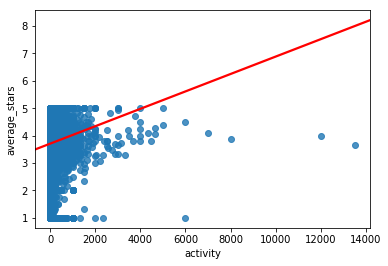

In [125]:
sns.regplot('activity', 'average_stars', userDf, line_kws = {"color":"r"}, ci=None)

The two data points on the right most are certainly outliers, so we try discarding them and rerun the model.

In [127]:
newUserDf=userDf.drop(userDf['activity'].idxmax())

In [128]:
newUserDf['activity'].max()

12000

In [129]:
newUserDf=newUserDf.drop(newUserDf['activity'].idxmax())

In [130]:
newUserDf['activity'].max()

8000

In [131]:
lm=sm.OLS.from_formula('activity~average_stars',newUserDf)
result=lm.fit()

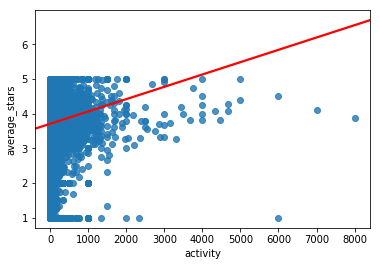

In [132]:
sns.regplot('activity', 'average_stars', newUserDf, line_kws = {"color":"r"}, ci=None)

In [133]:
userDf.loc[userDf['activity']==8000]

,average_stars,review_count,user_id,yelping_since,activity
84804,3.88,8,ucTsDuaXmzplLM8LaD9EfQ,2017-07-26,8000


In [134]:
newUserDf['activity'].max()

8000

In [135]:
userDf.loc[userDf['activity']==12000]

,average_stars,review_count,user_id,yelping_since,activity
102408,4.0,12,WqlMM_aK-YZIbZ8uqu7gTg,2017-07-26,12000


In [137]:
userDf.loc[userDf['yelping_since']=='2017-07-26']

,average_stars,review_count,user_id,yelping_since,activity
3107,1.00,2,2PQq3hSlLGT1ysBXTf6aDg,2017-07-26,2000
33564,5.00,1,NP70UyuODLULhSC9CrDKnw,2017-07-26,1000
38212,1.00,1,5rL5_6MeAUPhCkRbtTPZSQ,2017-07-26,1000
49124,1.00,1,9hj8HvSoa0uxLY7Al6EoBA,2017-07-26,1000
84804,3.88,8,ucTsDuaXmzplLM8LaD9EfQ,2017-07-26,8000
102408,4.00,12,WqlMM_aK-YZIbZ8uqu7gTg,2017-07-26,12000
135931,5.00,1,IhI0RF9_PEF9RyQhzElhCQ,2017-07-26,1000
156109,5.00,1,0Qq7TvEe40l8H0MU6F9_PA,2017-07-26,1000
179607,2.00,1,C2mKJ7tJFunXZHHcujbafA,2017-07-26,1000
185438,5.00,1,JCTlqAKBDVrf9ySd6VeCRQ,2017-07-26,1000


We are very curious about those outliers. 

#### Why did they write so many reviews once they sign up as a yelp user?

In [146]:
#Load the data frame file
reviewDf = pd.read_csv('reviewDfFile4.csv',index_col=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
reviewDf.loc[reviewDf['user_id']=='duDYbWuTmgxzAh5gK0f6Tw']

,business_id,date,review_id,stars,text,user_id
676447,rBko32y5vK13SD_sW3AG_g,2017-07-25,M5a64uFULsiubm0y4DoW0g,4.0,One of the cutest cafes in Pittsburgh! The caf...,duDYbWuTmgxzAh5gK0f6Tw


In [9]:
reviewDf = pd.read_csv('reviewDfFile8.csv',index_col=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
reviewDf.loc[reviewDf['user_id']=='duDYbWuTmgxzAh5gK0f6Tw']

,business_id,date,review_id,stars,text,user_id
467464,rBko32y5vK13SD_sW3AG_g,2017-07-25,M5a64uFULsiubm0y4DoW0g,4.0,One of the cutest cafes in Pittsburgh! The caf...,duDYbWuTmgxzAh5gK0f6Tw


### On which day does the most people sign up to become a yelp user?